In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UberDataset.csv')

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [5]:
df['PURPOSE'] = df['PURPOSE'].fillna('NOT')

In [6]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [9]:
from datetime import datetime
df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [11]:
df['day-night'] = pd.cut(x = df['time'], bins = [0,10,15,19,24], labels = ['Morning','Afternoon','Evening','Night'])

In [12]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(413, 10)

# Q: In which category do people book the most uber ride?
# Q: For which purpose do people book uber rides the most?

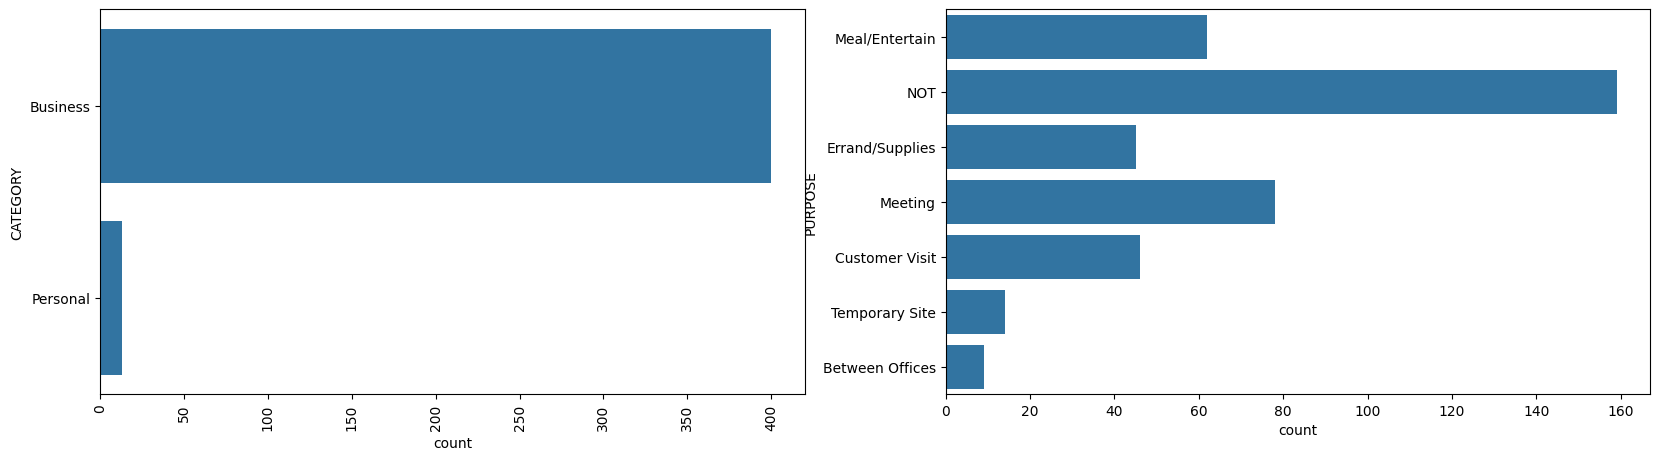

In [15]:
# data visualize
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.show()

# Q: At what time do people book cabs the most from the uber?

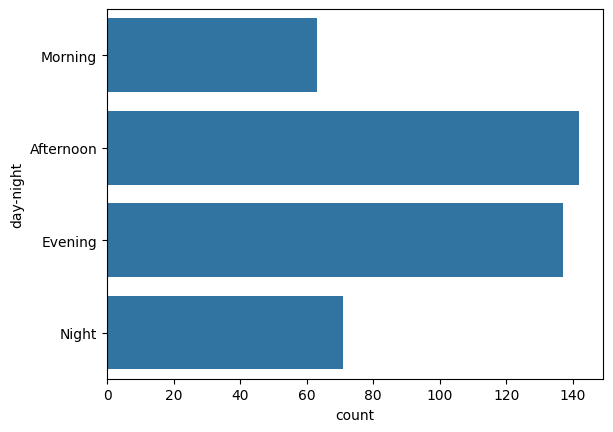

In [16]:
sns.countplot(df['day-night'])
plt.show()

# Q: In which months do people book uber rides less frequently?
# Q: On which days of the week do people book uber rides the most?

In [17]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['month'] = df['START_DATE'].dt.strftime('%b')
df['day'] = df['START_DATE'].dt.strftime('%a')

In [18]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


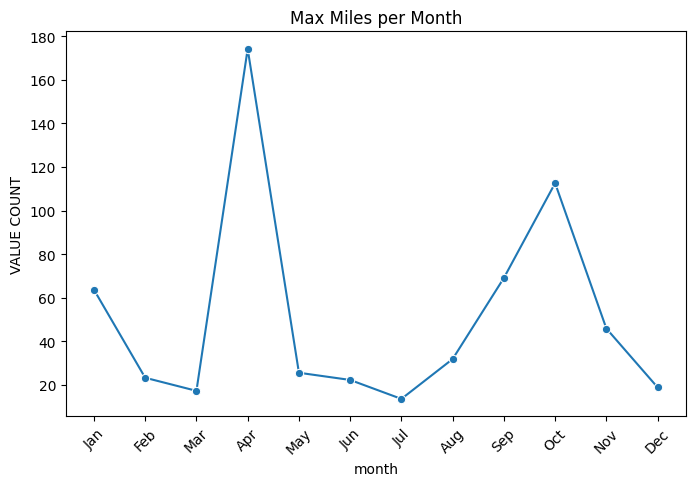

In [19]:
month_count = df.groupby('month', sort = False)['MILES'].max().reset_index()
month_count.columns = ['month', 'VALUE COUNT']
# Plot using Seaborn
plt.figure(figsize=(8, 5))
p = sns.lineplot(data = month_count, x = 'month', y='VALUE COUNT', marker='o')

# Set labels
p.set(xlabel='month', ylabel='VALUE COUNT', title='Max Miles per Month')

# Show plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.show()

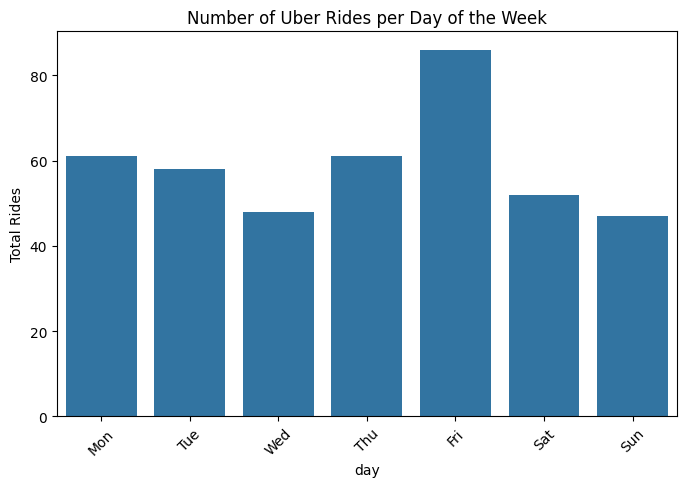

In [20]:
# Count the number of rides for each day
ride_counts = df['day'].value_counts().reset_index()
ride_counts.columns = ['day', 'Total Rides']

# Sort days in the correct order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ride_counts['day'] = pd.Categorical(ride_counts['day'], categories=day_order, ordered=True)
ride_counts = ride_counts.sort_values('day')

# Plot the data
plt.figure(figsize=(8, 5))
p = sns.barplot(data=ride_counts, x='day', y='Total Rides')

# Set labels and title
p.set(xlabel='day', ylabel='Total Rides', title='Number of Uber Rides per Day of the Week')

# Show plot
plt.xticks(rotation=45)
plt.show()

# Q: How many miles do people usually book a cab for through uber?

In [21]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


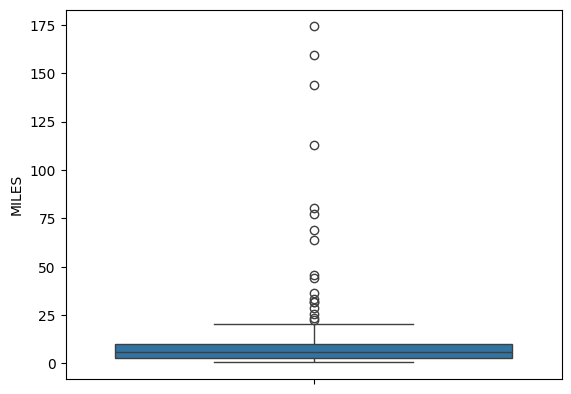

In [22]:
sns.boxplot(df['MILES'])
plt.show()

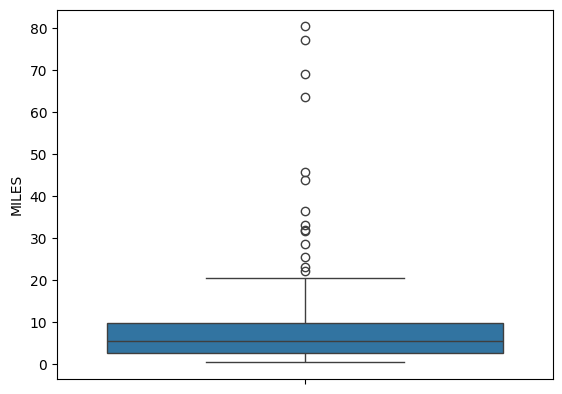

In [23]:
sns.boxplot(df[df['MILES']<100]['MILES'])
plt.show()

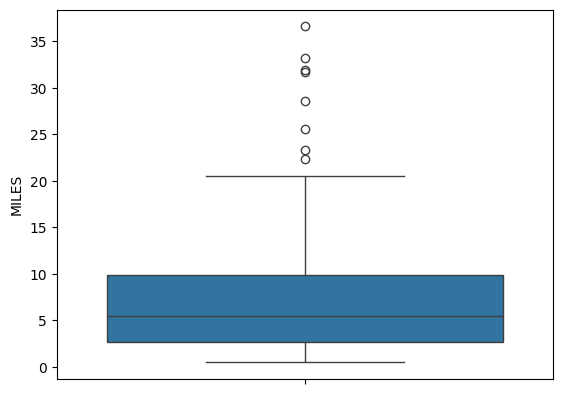

In [24]:
sns.boxplot(df[df['MILES']<40]['MILES'])
plt.show()

C:\Users\deshwar\AppData\Local\Temp\ipykernel_5288\2145299684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


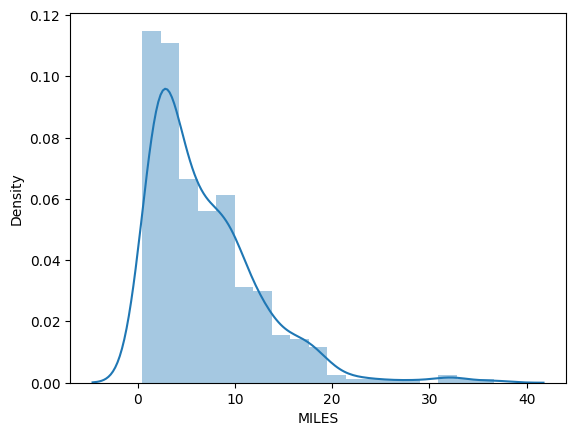

In [25]:
sns.distplot(df[df['MILES']<40]['MILES'])
plt.show()

📊 **Uber Ride Distance Statistics:**
👉 Average Ride Distance: 9.12 miles
👉 Median Ride Distance: 5.70 miles
👉 Most Common Ride Distance (Mode): 9.90 miles
👉 Minimum Ride Distance: 0.50 miles
👉 Maximum Ride Distance: 174.20 miles


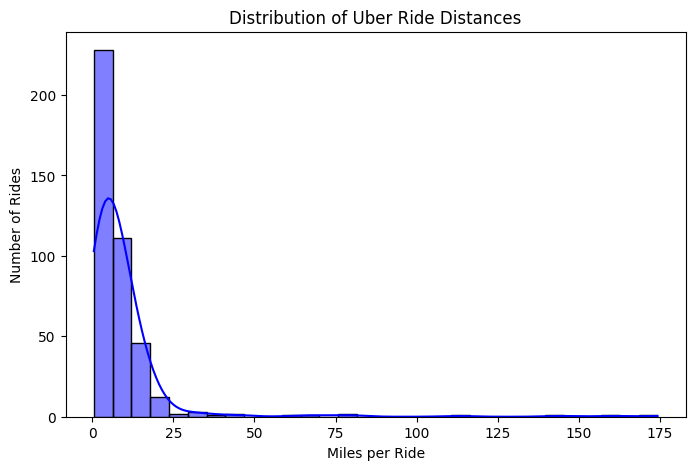

In [26]:
# Load dataset (assuming df is your DataFrame)
df['MILES'] = pd.to_numeric(df['MILES'], errors='coerce')  # Ensure 'miles' column is numeric

# Summary statistics
miles_mean = df['MILES'].mean()    # Average ride distance
miles_median = df['MILES'].median()  # Median ride distance
miles_mode = df['MILES'].mode()[0]   # Most frequent ride distance
miles_min = df['MILES'].min()       # Minimum ride distance
miles_max = df['MILES'].max()       # Maximum ride distance

print(f"📊 **Uber Ride Distance Statistics:**")
print(f"👉 Average Ride Distance: {miles_mean:.2f} miles")
print(f"👉 Median Ride Distance: {miles_median:.2f} miles")
print(f"👉 Most Common Ride Distance (Mode): {miles_mode:.2f} miles")
print(f"👉 Minimum Ride Distance: {miles_min:.2f} miles")
print(f"👉 Maximum Ride Distance: {miles_max:.2f} miles")

# Plot Histogram for ride distance distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['MILES'], bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Miles per Ride")
plt.ylabel("Number of Rides")
plt.title("Distribution of Uber Ride Distances")
plt.show()

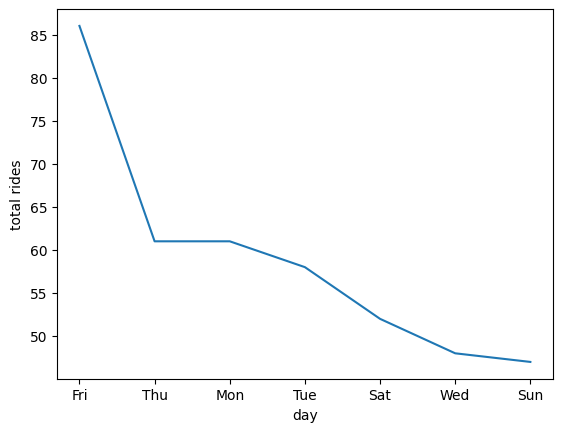

In [27]:
# Rides per day
count = df['day'].value_counts().reset_index()
count.columns = ['day', 'total rides']
count
sns.lineplot(x='day', y='total rides', data=count)
plt.show()

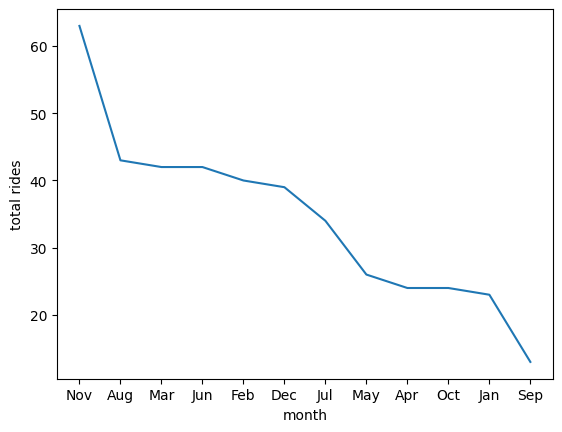

In [28]:
# Rides per month
count = df['month'].value_counts().reset_index()
count.columns = ['month', 'total rides']
count
sns.lineplot(x='month', y='total rides', data=count)
plt.show()

In [29]:
df.to_csv('UberDataset.csv', index = False)